In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as ss

In [2]:
df1 = pd.read_csv("Data_Processed/Prediction.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190866 entries, 0 to 190865
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             190866 non-null  object 
 1   District          190866 non-null  object 
 2   Crop              190866 non-null  object 
 3   Year              190866 non-null  int64  
 4   Season            190866 non-null  object 
 5   Area              190866 non-null  float64
 6   Area Units        190866 non-null  object 
 7   Production        190866 non-null  float64
 8   Production Units  190866 non-null  object 
 9   Yield             190866 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 14.6+ MB


In [3]:
df1.nunique()

State                   33
District               725
Crop                    28
Year                    24
Season                   4
Area                 35523
Area Units               1
Production           48236
Production Units         2
Yield               120050
dtype: int64

In [4]:
Year = df1["Year"].unique()
print(Year)

[2001 2002 2003 2004 2006 2005 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2000 1997 1998 1999]


In [5]:
df1["Production Units"].unique()

array(['Tonnes', 'Bales'], dtype=object)

In [6]:
df1.loc[df1["Production Units"] == "Bales", "Production"] *= 0.24
df1.loc[df1["Production Units"] == "Bales", "Production Units"] = "Tonnes"

In [7]:
df1["Production Units"].unique()

array(['Tonnes'], dtype=object)

In [8]:
df1.nunique()

State                   33
District               725
Crop                    28
Year                    24
Season                   4
Area                 35523
Area Units               1
Production           50399
Production Units         1
Yield               120050
dtype: int64

In [9]:
df1 = df1.drop(["Area Units", "Production Units", "Yield"],axis=1)
df1.nunique()

State            33
District        725
Crop             28
Year             24
Season            4
Area          35523
Production    50399
dtype: int64

In [10]:
df1["Crop"].unique()

array(['arecanut', 'banana', 'black pepper', 'cashewnuts', 'ginger',
       'other kharif pulses', 'rice', 'sweetpotato', 'coriander',
       'cotton', 'horse-gram', 'jowar', 'maize', 'moong', 'onion',
       'potato', 'ragi', 'rapeseed & mustard', 'sesamum', 'soyabean',
       'sunflower', 'tapioca', 'turmeric', 'wheat', 'jute', 'barley',
       'garlic', 'cardamom'], dtype=object)

In [11]:
df1["State"].unique()

array(['andaman and nicobar islands', 'andhra pradesh',
       'arunachal pradesh', 'assam', 'bihar', 'chandigarh',
       'chhattisgarh', 'dadra and nagar haveli', 'gujarat', 'haryana',
       'goa', 'himachal pradesh', 'jammu and kashmir', 'jharkhand',
       'karnataka', 'kerala', 'madhya pradesh', 'maharashtra', 'manipur',
       'meghalaya', 'mizoram', 'nagaland', 'odisha', 'puducherry',
       'punjab', 'rajasthan', 'sikkim', 'tamil nadu', 'tripura',
       'uttar pradesh', 'uttarakhand', 'west bengal', 'telangana'],
      dtype=object)

In [12]:
df1["Season"].unique()

array(['kharif', 'whole year', 'rabi', 'summer'], dtype=object)

In [13]:
df1.head()

,State,District,Crop,Year,Season,Area,Production
0,andaman and nicobar islands,nicobars,arecanut,2001,kharif,1254.0,2061.0
1,andaman and nicobar islands,nicobars,arecanut,2002,whole year,1258.0,2083.0
2,andaman and nicobar islands,nicobars,arecanut,2003,whole year,1261.0,1525.0
3,andaman and nicobar islands,north and middle andaman,arecanut,2001,kharif,3100.0,5239.0
4,andaman and nicobar islands,south andamans,arecanut,2002,whole year,3105.0,5267.0


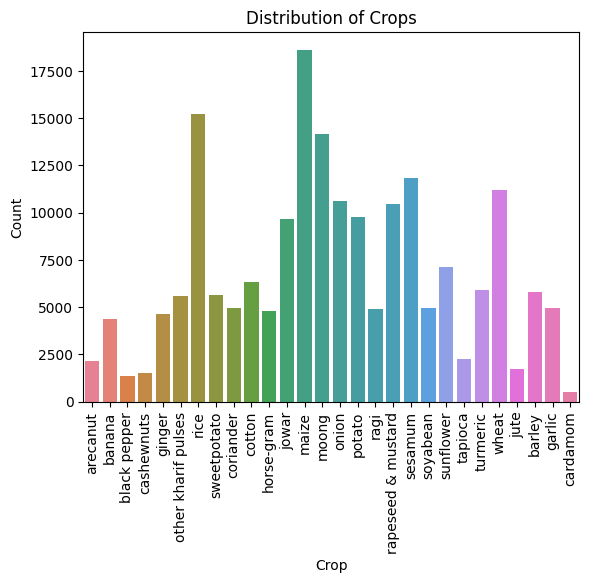

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df1, x='Crop',hue='Crop')
plt.title('Distribution of Crops')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


<Axes: xlabel='Year', ylabel='Production'>

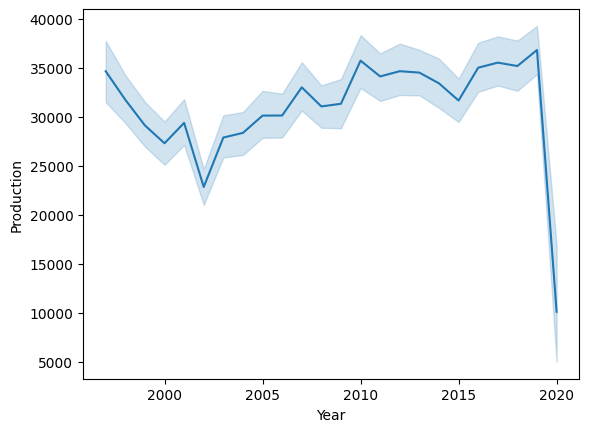

In [15]:
sns.lineplot(data=df1, x='Year',y='Production')

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler

In [17]:
label_encoders = {}
categorical_features = ['State', 'District', 'Crop','Season']
for feature in categorical_features:
    le = LabelEncoder()
    df1[feature] = le.fit_transform(df1[feature])
    label_encoders[feature] = le

In [18]:
#scaler1a = StandardScaler()
#scaler1b = StandardScaler()
scaler1c = StandardScaler()
scaler1a = MinMaxScaler()
scaler1b = MinMaxScaler()
# scaler1c = MinMaxScaler()
numerical_features = ['Area', 'Production','Year']

if 'Area' in df1.columns:
    df1['Area'] = scaler1a.fit_transform(df1[['Area']])

if 'Production' in df1.columns:
    df1['Production'] = scaler1b.fit_transform(df1[['Production']])
    
if 'Year' in df1.columns:
    df1['Year'] = scaler1c.fit_transform(df1[['Year']])
    

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190866 entries, 0 to 190865
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       190866 non-null  int32  
 1   District    190866 non-null  int32  
 2   Crop        190866 non-null  int32  
 3   Year        190866 non-null  float64
 4   Season      190866 non-null  int32  
 5   Area        190866 non-null  float64
 6   Production  190866 non-null  float64
dtypes: float64(3), int32(4)
memory usage: 7.3 MB


In [20]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length][-1]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys).reshape(-1, 1)

seq_length = 10
features = ['State', 'District', 'Crop', 'Year', 'Season', 'Area']
target = 'Production'

data = df1[features + [target]].values
X, y = create_sequences(data, seq_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

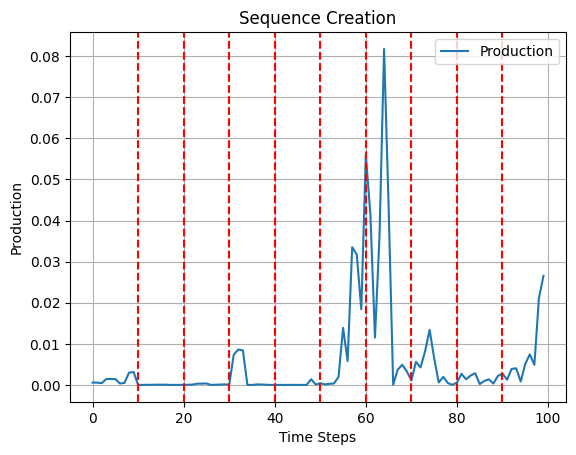

In [21]:
sequence_length = 10
production_values = df1['Production'].values[:100]

plt.plot(production_values, label='Production')
for i in range(0, len(production_values) - sequence_length, sequence_length):
    plt.axvline(i + sequence_length, color='r', linestyle='--')

plt.title('Sequence Creation')
plt.xlabel('Time Steps')
plt.ylabel('Production')
plt.legend()
plt.grid()
plt.show()


In [22]:
import torch
from torch.utils.data import Dataset, DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx], dtype=torch.float32).to(device), torch.tensor(self.y[idx], dtype=torch.float32).to(device)


Using device: cuda


In [23]:
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [24]:
import torch.nn as nn

class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=1):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=1):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])
        return out

In [25]:
input_dim = X_train.shape[2]
hidden_dim = 50
output_dim = 1
num_layers = 3

rnn_model1 = RNNModel(input_dim, hidden_dim, output_dim, num_layers).to(device)
lstm_model1 = LSTMModel(input_dim, hidden_dim, output_dim, num_layers).to(device)
gru_model1 = GRUModel(input_dim, hidden_dim, output_dim, num_layers).to(device)


In [26]:
import torch.optim as optim

# def train_model(model, train_loader,test_loader,criterion, optimizer, num_epochs=10):
#     xt = [0]
#     yt = [0]
#     model.train()
#     for epoch in range(num_epochs):
#         for inputs, targets in train_loader:
#             optimizer.zero_grad()
#             outputs = model(inputs)
#             loss = criterion(outputs, targets)
#             loss.backward()
#             optimizer.step()
#         model.eval()
#         with torch.no_grad():
#             for inputs, targets in test_loader:
#                 outputs = model(inputs)
#                 loss = criterion(outputs, targets)
#                 loss.item()
        
        
#         xt.append(epoch+1)
#         yt.append(loss.item())
#         print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')
        
    
#     xt = np.array(xt)
#     yt = np.array(yt)
#     plt.plot(xt,yt)
#     plt.xlabel("Epochs")
#     plt.ylabel("Avg_Epoch_Loss per Epoch")
#     plt.title("Epoch vs Loss Plot")
#     plt.show()

In [27]:
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=10):
    train_losses = []
    test_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0
        
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            
            running_train_loss += loss.item()
        
        avg_train_loss = running_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        
        model.eval()
        running_test_loss = 0.0
        
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                running_test_loss += loss.item()
        
        avg_test_loss = running_test_loss / len(test_loader)
        test_losses.append(avg_test_loss)
        
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}')
    
    epochs = np.arange(1, num_epochs + 1)
    
    # Plotting Loss

    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, test_losses, label='Test Loss')
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train vs Test Loss')
    plt.legend()
    plt.show()

Epoch 1/15, Train Loss: 0.0009, Test Loss: 0.0008
Epoch 2/15, Train Loss: 0.0008, Test Loss: 0.0012
Epoch 3/15, Train Loss: 0.0006, Test Loss: 0.0005
Epoch 4/15, Train Loss: 0.0006, Test Loss: 0.0005
Epoch 5/15, Train Loss: 0.0006, Test Loss: 0.0005
Epoch 6/15, Train Loss: 0.0006, Test Loss: 0.0006
Epoch 7/15, Train Loss: 0.0005, Test Loss: 0.0004
Epoch 8/15, Train Loss: 0.0006, Test Loss: 0.0005
Epoch 9/15, Train Loss: 0.0005, Test Loss: 0.0004
Epoch 10/15, Train Loss: 0.0005, Test Loss: 0.0006
Epoch 11/15, Train Loss: 0.0005, Test Loss: 0.0005
Epoch 12/15, Train Loss: 0.0005, Test Loss: 0.0005
Epoch 13/15, Train Loss: 0.0005, Test Loss: 0.0004
Epoch 14/15, Train Loss: 0.0005, Test Loss: 0.0005
Epoch 15/15, Train Loss: 0.0005, Test Loss: 0.0004


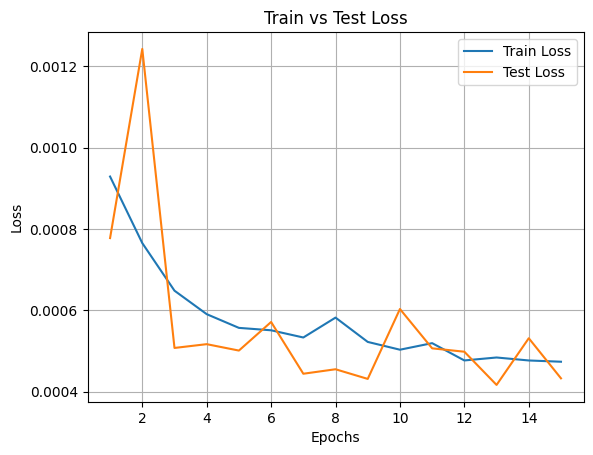

Epoch 1/15, Train Loss: 0.0009, Test Loss: 0.0008
Epoch 2/15, Train Loss: 0.0006, Test Loss: 0.0005
Epoch 3/15, Train Loss: 0.0006, Test Loss: 0.0005
Epoch 4/15, Train Loss: 0.0005, Test Loss: 0.0005
Epoch 5/15, Train Loss: 0.0005, Test Loss: 0.0005
Epoch 6/15, Train Loss: 0.0005, Test Loss: 0.0004
Epoch 7/15, Train Loss: 0.0005, Test Loss: 0.0004
Epoch 8/15, Train Loss: 0.0005, Test Loss: 0.0004
Epoch 9/15, Train Loss: 0.0005, Test Loss: 0.0005
Epoch 10/15, Train Loss: 0.0005, Test Loss: 0.0004
Epoch 11/15, Train Loss: 0.0004, Test Loss: 0.0004
Epoch 12/15, Train Loss: 0.0004, Test Loss: 0.0004
Epoch 13/15, Train Loss: 0.0004, Test Loss: 0.0004
Epoch 14/15, Train Loss: 0.0004, Test Loss: 0.0004
Epoch 15/15, Train Loss: 0.0004, Test Loss: 0.0004


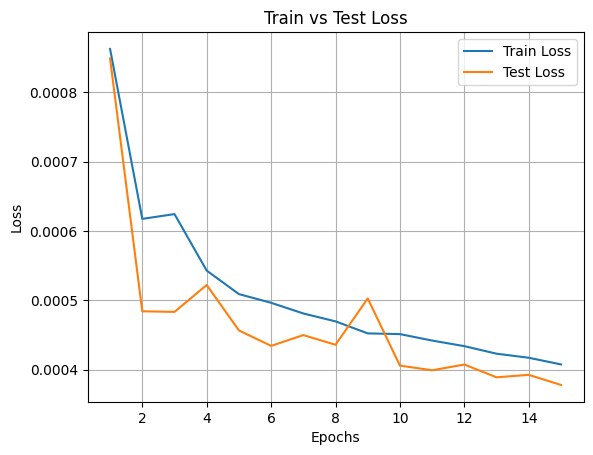

Epoch 1/15, Train Loss: 0.0009, Test Loss: 0.0006
Epoch 2/15, Train Loss: 0.0006, Test Loss: 0.0005
Epoch 3/15, Train Loss: 0.0006, Test Loss: 0.0005
Epoch 4/15, Train Loss: 0.0005, Test Loss: 0.0004
Epoch 5/15, Train Loss: 0.0005, Test Loss: 0.0004
Epoch 6/15, Train Loss: 0.0005, Test Loss: 0.0004
Epoch 7/15, Train Loss: 0.0005, Test Loss: 0.0008
Epoch 8/15, Train Loss: 0.0005, Test Loss: 0.0006
Epoch 9/15, Train Loss: 0.0004, Test Loss: 0.0005
Epoch 10/15, Train Loss: 0.0004, Test Loss: 0.0004
Epoch 11/15, Train Loss: 0.0004, Test Loss: 0.0004
Epoch 12/15, Train Loss: 0.0004, Test Loss: 0.0004
Epoch 13/15, Train Loss: 0.0004, Test Loss: 0.0004
Epoch 14/15, Train Loss: 0.0004, Test Loss: 0.0004
Epoch 15/15, Train Loss: 0.0004, Test Loss: 0.0007


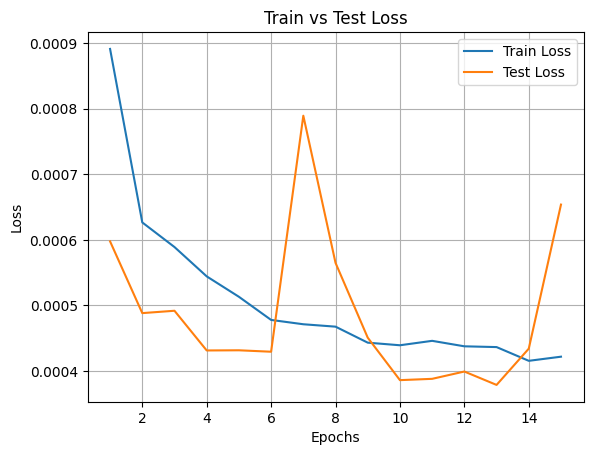

In [28]:
criterion1 = nn.MSELoss()
rnn_optimizer1 = optim.Adam(rnn_model1.parameters(), lr=0.001)
lstm_optimizer1 = optim.Adam(lstm_model1.parameters(), lr=0.001)
gru_optimizer1 = optim.Adam(gru_model1.parameters(), lr=0.001)

train_model(rnn_model1, train_loader, test_loader, criterion1, rnn_optimizer1, num_epochs=15)
train_model(lstm_model1, train_loader, test_loader, criterion1, lstm_optimizer1, num_epochs=15)
train_model(gru_model1, train_loader, test_loader, criterion1, gru_optimizer1, num_epochs=15)

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(model, test_loader, criterion):
    model.eval()
    total_loss = 0
    all_targets = []
    all_predictions = []
    
    try:
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                total_loss += loss.item()
                
                all_targets.extend(targets.cpu().numpy())
                all_predictions.extend(outputs.cpu().numpy())
    except Exception as e:
        print(f"An error occurred during model evaluation: {e}")
        return None
    
    avg_loss = total_loss / len(test_loader)
    mse = mean_squared_error(all_targets, all_predictions)
    mae = mean_absolute_error(all_targets, all_predictions)
    r2 = r2_score(all_targets, all_predictions)
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    
    print(f'Average Loss: {avg_loss:.4f}')
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'Mean Absolute Error: {mae:.4f}')
    print(f'R-squared: {r2:.4f}')
    print(f'Root Mean Squared Error: {rmse:.4f}')
    
    metrics = {'MSE': mse, 'MAE': mae, 'R-squared': r2, 'RMSE': rmse}
    metric_names = list(metrics.keys())
    metric_values = list(metrics.values())
    
    plt.figure(figsize=(10, 5))
    plt.bar(metric_names, metric_values, color=['blue', 'green', 'red', 'purple'])
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.title('Evaluation Metrics for Regression')
    plt.grid(True)
    plt.show()
    
    # Plot Predictions vs Actual values
    plt.figure(figsize=(10, 5))
    #plt.scatter(all_targets, all_predictions, alpha=0.5)
    plt.plot(all_targets,label="Actual")
    plt.plot(all_predictions,label="Predictions")
    #plt.plot([min(all_targets), max(all_targets)], [min(all_targets), max(all_targets)], color='red', linewidth=2)
    plt.xlabel('Test Cases')
    plt.ylabel('Values')
    plt.title('Predictions vs Actual Values')
    plt.grid(True)
    plt.show()
    
    return avg_loss, mse, mae, r2, rmse

Average Loss: 0.0004
Mean Squared Error: 0.0004
Mean Absolute Error: 0.0071
R-squared: 0.5319
Root Mean Squared Error: 0.0208


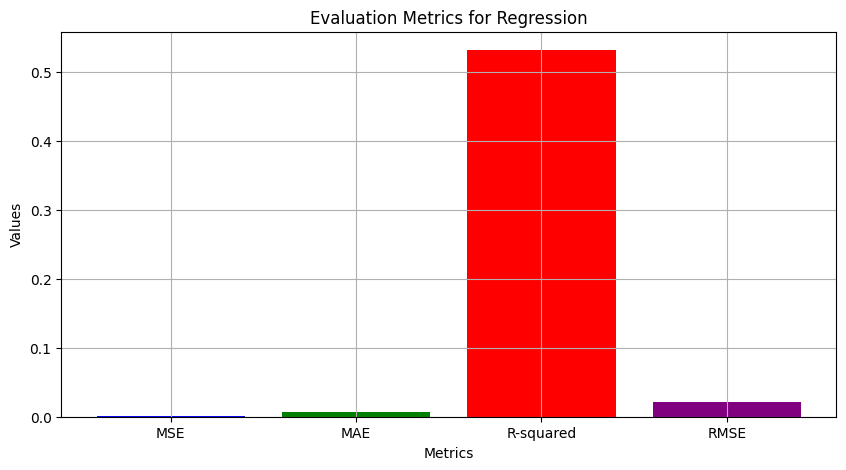

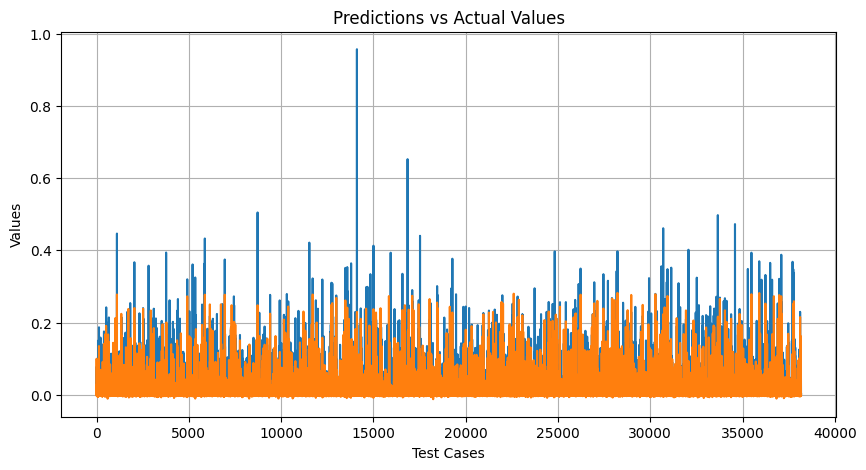

Average Loss: 0.0004
Mean Squared Error: 0.0004
Mean Absolute Error: 0.0070
R-squared: 0.5909
Root Mean Squared Error: 0.0194


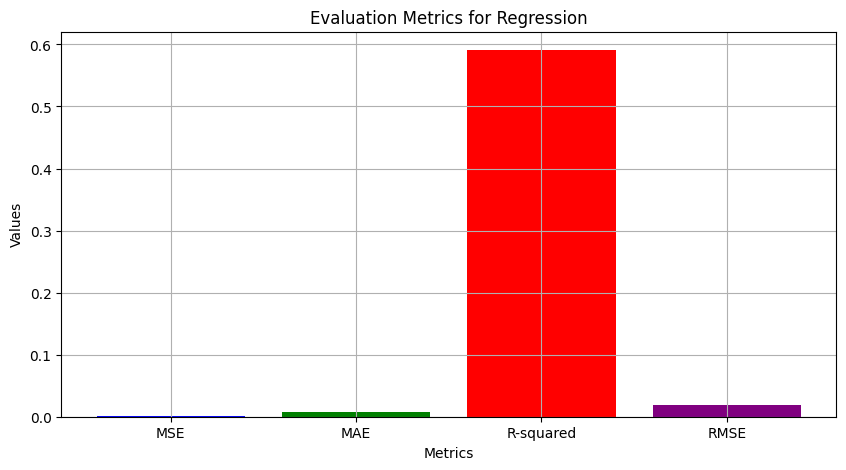

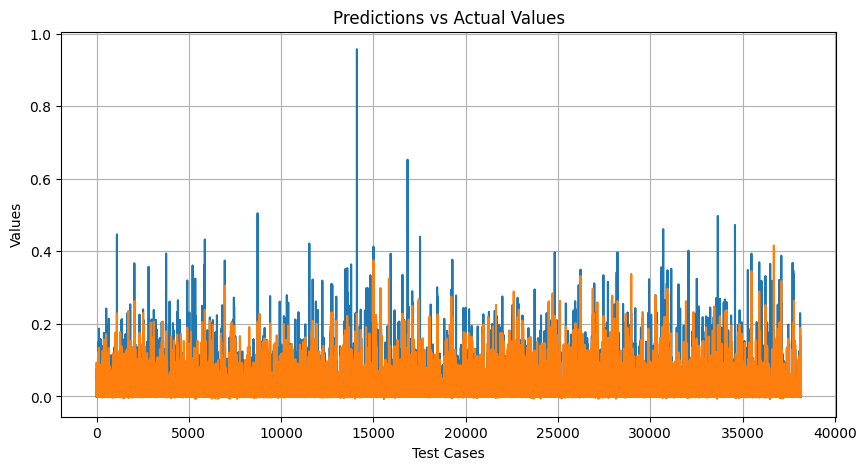

Average Loss: 0.0007
Mean Squared Error: 0.0007
Mean Absolute Error: 0.0100
R-squared: 0.2924
Root Mean Squared Error: 0.0256


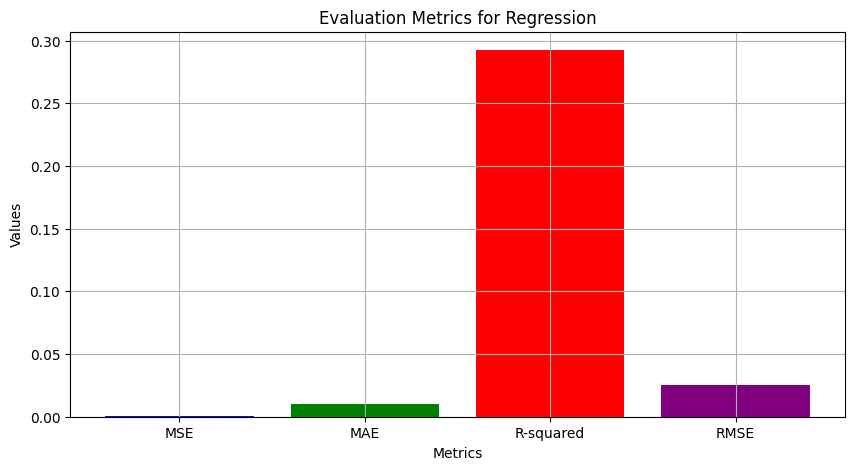

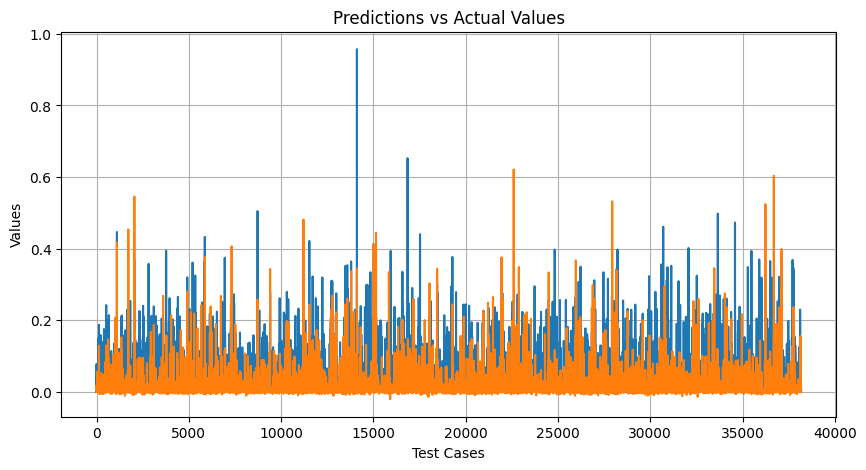

RNN Loss: (0.00043253824487436937, 0.00043255006, 0.0071023954, 0.5318688294093461, 0.020797838)
LSTM Loss: (0.0003779798345583704, 0.000377988, 0.007005022, 0.5909190802299915, 0.019441914)
GRU Loss: (0.0006537716129792473, 0.0006538018, 0.010041206, 0.29241720090093415, 0.025569547)


In [30]:
rnn_loss1 = evaluate_model(rnn_model1, test_loader, criterion1)
lstm_loss1 = evaluate_model(lstm_model1, test_loader, criterion1)
gru_loss1 = evaluate_model(gru_model1, test_loader, criterion1)


print(f'RNN Loss: {rnn_loss1}')
print(f'LSTM Loss: {lstm_loss1}')
print(f'GRU Loss: {gru_loss1}')

In [31]:
from torchviz import make_dot

model = rnn_model1
input_tensor = torch.randn(1, 10, 7).to(device)
output = model(input_tensor)
graph = make_dot(
    output,
    params=dict(model.named_parameters()),
    show_attrs=True,
    show_saved=True,
)
graph.render('rnn1_graph', format="pdf")

'rnn1_graph.pdf'

In [32]:
model = gru_model1
input_tensor = torch.randn(1, 10, 7).to(device)
output = model(input_tensor)
graph = make_dot(
    output,
    params=dict(model.named_parameters()),
    show_attrs=True,
    show_saved=True,
)
graph.render('gru1_graph', format="pdf")

'gru1_graph.pdf'

In [33]:
model = lstm_model1
input_tensor = torch.randn(1, 10, 7).to(device)
output = model(input_tensor)
graph = make_dot(
    output,
    params=dict(model.named_parameters()),
    show_attrs=True,
    show_saved=True,
)
graph.render('lstm1_graph',  format="pdf")

'lstm1_graph.pdf'